# <center> Comparisons of CEMS fossil, PJM fossil, and PJM non-emitting generation </center>

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
cems_pjm = pd.read_csv(os.path.join(os.pardir, 'data', 'cems', 'formatted_data', 'cems_isorto.csv'), index_col=0, parse_dates=[0], 
                       usecols=['DATE_UTC', 'isorto', 'gload_mwh'])
cems_pjm = pd.DataFrame(cems_pjm[cems_pjm['isorto'] == 'PJM']).drop('isorto', axis=1)
cems_pjm.columns = ['CEMS Fossil Generation']
cems_pjm = cems_pjm.shift(5).dropna() # deal with UTC-5
cems_pjm = cems_pjm.apply(lambda x: pd.to_numeric(x))

In [3]:
NON_EMIT = ['Nuclear', 'Wind', 'Hydro', 'Solar', 'Other Renewables']
FOSSIL = ['Coal', 'Gas', 'Multiple Fuels', 'Oil']
pjm_all = pd.read_csv(os.path.join(os.pardir, 'data', 'pjm_gen_by_fuel', 'formatted_data', 
                                   'pjm_gen_by_fuel_type.csv'), index_col=0, parse_dates=[0])

pjm_ne = pjm_all[pjm_all['FUEL_TYPE'].map(lambda x: x in NON_EMIT)]
pjm_ne = pd.DataFrame(pjm_ne['Generation (MW)'].groupby(pjm_ne.index).sum())
pjm_ne.columns = ['Non-emitting Generation']
pjm_ne = pjm_ne.apply(lambda x: pd.to_numeric(x))


pjm_e = pjm_all[pjm_all['FUEL_TYPE'].map(lambda x: x in FOSSIL)]
pjm_e = pd.DataFrame(pjm_e['Generation (MW)'].groupby(pjm_e.index).sum())
pjm_e.columns = ['PJM Fossil Generation']
pjm_e = pjm_e.apply(lambda x: pd.to_numeric(x)).applymap(lambda x: np.nan if x < 10 else x)

## Non-emitting in PJM 

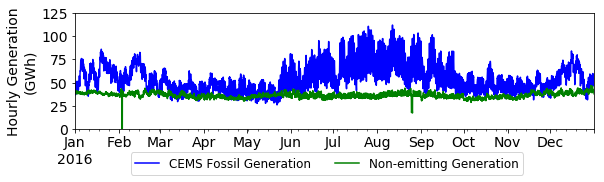

In [4]:
fig, ax = plt.subplots(figsize=(8.5, 2.5))
df = pd.concat([cems_pjm.loc['2016-01-01':'2016-12-31'], pjm_ne.loc['2016-01-01':'2016-12-31']], axis=1)
(df/1e3).plot(ax=ax, legend=False, color=['blue', 'green'])
lgd = ax.legend(bbox_to_anchor=(0.875, -0.15), ncol=2, fontsize=12)
ax.set_xlabel('')
ax.set_ylabel('Hourly Generation\n(GWh)')
ax.set_ylim(0, 125)
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(14)
plt.tight_layout()

## Fossil in PJM vs. CEMS 

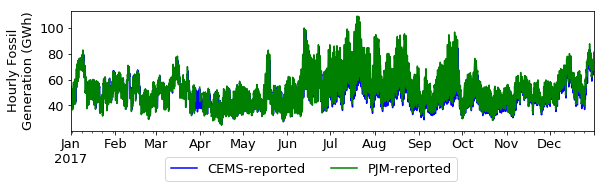

In [5]:
fig, ax = plt.subplots(figsize=(8.5, 2.5))
df = pd.concat([cems_pjm.loc['2017-01-01':'2017-12-31'], pjm_e.loc['2017-01-01':'2017-12-31']], axis=1)
(df/1e3).plot(ax=ax, legend=False, color=['blue', 'green'])
handles, labels = ax.get_legend_handles_labels()
lgd = ax.legend(handles, ['CEMS-reported', 'PJM-reported'], bbox_to_anchor=(0.75, -0.17), ncol=2, fontsize=13)
ax.set_xlabel('')
ax.set_ylabel('Hourly Fossil\nGeneration (GWh)')
# ax.set_ylim(0, 125)
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(13)
plt.tight_layout()
if not os.path.exists('figures'):
    os.makedirs('figures')
fig.savefig(os.path.join('figures', 'cems_pjm_fossil_generation.pdf'), bbox_extra_artists=(lgd,), bbox_inches='tight')

In [6]:
cems2017 = cems_pjm.loc['2017-01-01':'2017-12-31']
cems2017.columns = ['Generation']
pjm2017  = pjm_e.loc['2017-01-01':'2017-12-31']
pjm2017.columns = ['Generation']

In [7]:
pdiff = (pjm2017 - cems2017)/cems2017

In [8]:
pdiff.mean()

Generation    0.056847
dtype: float64

In [9]:
pdiff.median()

Generation    0.042004
dtype: float64

In [10]:
abs(pdiff).mean()

Generation    0.175752
dtype: float64

In [11]:
pdiff.max()

Generation    0.898339
dtype: float64

In [12]:
pdiff.min()

Generation   -0.414213
dtype: float64